# Predict man's vs woman's clothing

Image Data from: http://www.image-net.org/

In [42]:
import numpy as np
from sklearn.decomposition import PCA
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
man_images = glob('man_200_resized/*')
woman_images = glob('woman_200_resized/*')

### preprocessing of size and shape has been done before.

import cv2, glob

images = glob.glob("*")

for image in images:

    img = cv2.imread(image,1)
    
    re = cv2.resize(img, (100,200))
    
    cv2.imwrite("resized_"+image, re)

In [35]:
def transform_image(file):
    with open(file, 'r+b') as f:
        with Image.open(f) as image:
            return np.array(image).flatten()
images = [(read_image(path), 1) for path in man_images] +\
    [(read_image(path), 0) for path in woman_images]

X = np.array([image[0] for image in images])
Y = np.array([image[1] for image in images])

X.shape

(232, 60000)

In [22]:
pca = PCA(n_components=232)

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=232, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
variance_explained = pca.explained_variance_ratio_
cum_var_explained = np.cumsum(variance_explained)

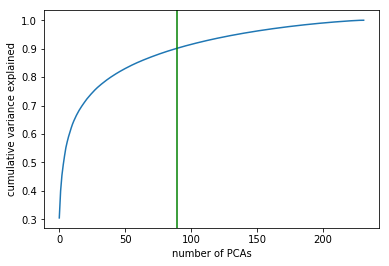

In [58]:
x = next(x[0] for x in enumerate(cum_var_explained) if x[1] > 0.9)

plt.plot(cum_var_explained)
plt.axvline(x=x, color='g')
plt.ylabel('cumulative variance explained')
plt.xlabel('number of PCAs')
plt.show()